In [8]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Step 2: Load the dataset
df = pd.read_csv('/content/emails.csv')

# Step 3: Check column names (make sure to adjust column names in the next steps)
print(df.columns)

# Step 4: Extract features and labels
X = df['text']  # Adjust this according to your dataset's actual column name for text
y = df['spam']    # Adjust this according to your dataset's actual column name for labels

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 7: Initialize and train the SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Step 8: Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Step 9: Evaluate the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

print(classification_report(y_test, y_pred))


Index(['text', 'spam'], dtype='object')
Accuracy: 98.95%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1278
           1       0.99      0.97      0.98       441

    accuracy                           0.99      1719
   macro avg       0.99      0.98      0.99      1719
weighted avg       0.99      0.99      0.99      1719



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


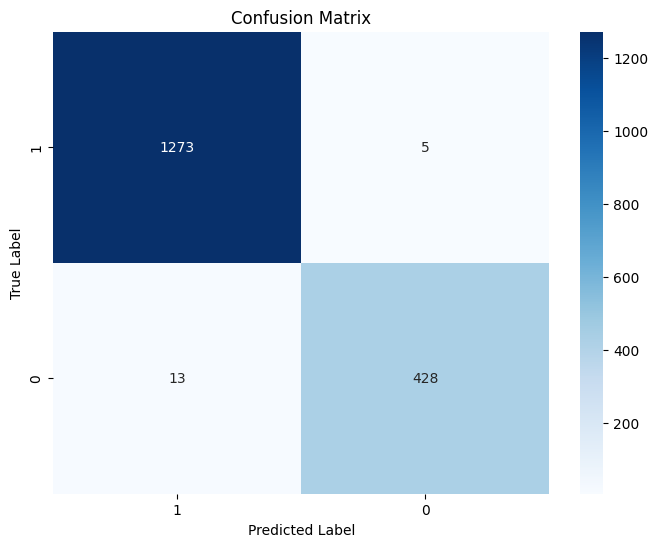

In [11]:
# Step 9: Evaluate the model with a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 10: Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['spam'].unique(), yticklabels=df['spam'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.pyplot as plt
import numpy as np


In [13]:
# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())


In [14]:
# Train SVM on reduced data
svm_model_pca = SVC(kernel='linear')
svm_model_pca.fit(X_train_pca, y_train)

# Predict on test data
y_pred_pca = svm_model_pca.predict(X_test_pca)


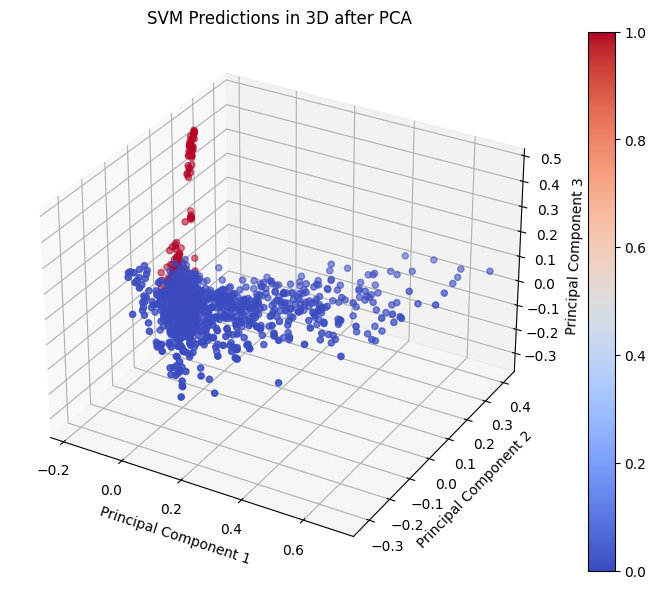

In [15]:
# Plot 3D graph of the SVM predictions
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the training points
scatter = ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_pred_pca, cmap='coolwarm', marker='o')

# Add labels and title
ax.set_title("SVM Predictions in 3D after PCA")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show color bar
plt.colorbar(scatter)
plt.show()


# New Section